# CHE 1148 Assignment 5
## 1. Partial dependency plots
Generate the partial dependency plots for the top 5 features in your best Random Forest model from the previous assignment.
* 1 graph for each feature.
* population distribution (%) as the primary y-axis; the response rate (%) as the secondary y-axis.
* identify the best bin edges (use a single tree model with the feature of interest/ pick values that relevant. 
* Make sure that appropriate scaling of the axis for the best visualization & interpretation.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

#### Prepare data, monthly_features_output is used.

In [2]:
monthly_features_outputs = pd.read_excel('monthly_features_outputs.xlsx')
monthly_features_outputs

,Unnamed: 0.1,Unnamed: 0,customer_id,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,0,157064,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,32,0
1,1,157058,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,1,15,0
2,2,157044,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,...,NaN,0,0,0,0,0,0,0,46,0
3,3,157069,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,...,NaN,1,0,0,0,0,0,0,12,0
4,4,157060,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,...,NaN,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,323543,295140,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,...,1.0,0,0,0,0,0,0,0,98,0
323544,323544,295126,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,...,1.0,0,0,0,0,0,0,0,129,0
323545,323545,295119,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,...,1.0,0,0,0,0,0,0,0,160,0
323546,323546,295136,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [3]:
#drop uncessary columns
X_y_monthly = monthly_features_outputs.drop(columns = ['Unnamed: 0.1','Unnamed: 0','customer_id']).fillna(0)


X_monthly = X_y_monthly.drop(['response'], axis = 1).fillna(0)
y_monthly = X_y_monthly['response']

#check size of X and y
print(X_monthly.shape,y_monthly.shape)

(323548, 29) (323548,)


#### Fit the data to the best best Random Forest (monthly) model  created in the previous assignment. 
Similarly, I choose the values of hyperparameters according to the tunned results from 1147 assignment, as I think the tunning result is better as more hyperparameters are involved.

In [4]:
RFC_monthly = RandomForestClassifier(random_state= 1148,class_weight= {0:1,1:10},
                                     max_features= 7,max_depth= 6,n_estimators=  50)

#Fit the training data, except the datatime column
X_monthly_new = X_monthly.drop(['ME_DT'], axis=1)
RFC_monthly.fit(X_monthly_new, y_monthly) 

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=6, max_features=7,
                       n_estimators=50, random_state=1148)

#### Monthly top 5 features of the model

In [5]:
fea_importance = pd.DataFrame({'feature':X_monthly_new.columns,'importance':abs(RFC_monthly.feature_importances_)})
top_5_fea = fea_importance.sort_values(by=['importance'], ascending=False).iloc[:5]
top_5_fea

,feature,importance
14,amt_sum_12M,0.240268
15,amt_mean_12M,0.202237
16,amt_max_12M,0.110253
9,amt_mean_6M,0.074901
17,txn_cnt_sum_12M,0.070683


#### 1 graph for each feature; identify the best bin edges; make sure that appropriate scaling of the axis.

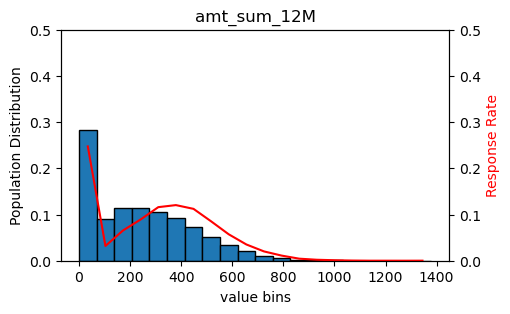

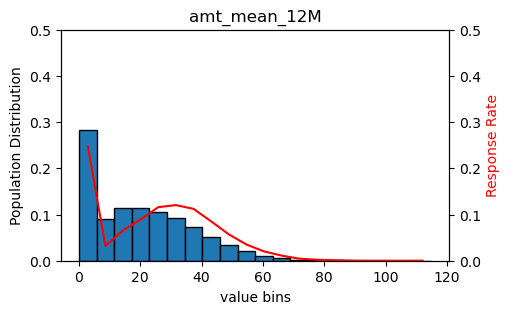

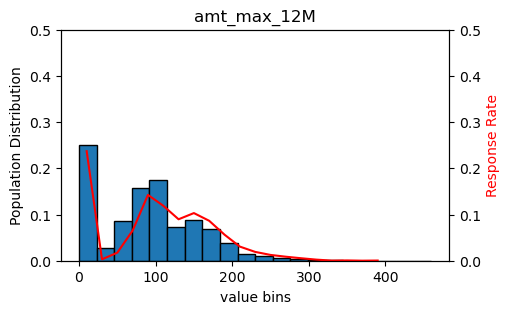

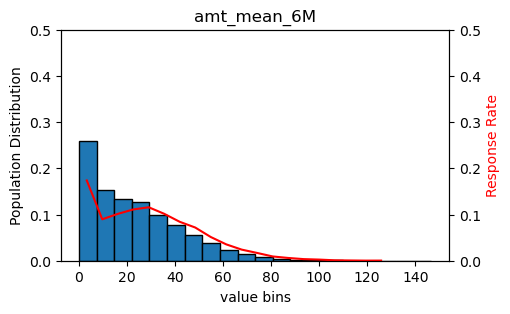

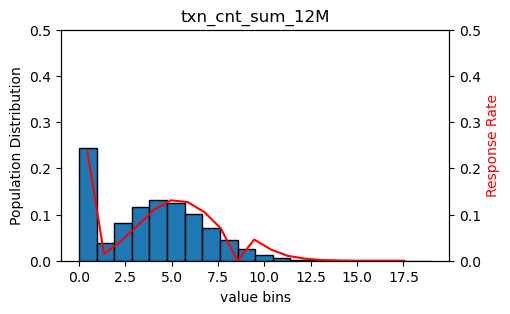

In [109]:
for i, fea in enumerate(top_5_fea.feature.values):
    fig, ax = plt.subplots(figsize = (5, 3))
    plt.title(fea)
    
    # Population Distribution -main
    weights = np.ones_like(X_monthly_new[fea])/(len(X_monthly_new[fea]))
    ax.hist(X_y_monthly[fea], bins = 20, weights=weights, edgecolor='black')
    ax.set_xlabel('value bins')
    ax.set_ylabel('Population Distribution')
    ax.set_ylim(0,0.5)
    
    #Response Rate -secondary
    ax2 = ax.twinx()
    hist, bin_edges = np.histogram(X_y_monthly[fea][X_y_monthly['response']==1], bins=20)
    bin_edges = bin_edges[1:]
    ax2.plot(bin_edges - 0.25*(bin_edges[1]), hist/sum(hist), color='red')
    ax2.set_ylabel('Response Rate', color='red')
    ax2.set_ylim(0,0.5)
    
    plt.show()

One-way PDPs tell us about the interaction between the target response and an input feature of interest.

The five most important features are amt_sum_12M, amt_mean_12M, amt_max_12M, amt_mean_6M and txn_cnt_sum_12M, and according to the each plot above, it is clear that there is a drop of response rate from the first to second bin, so we have to think about how the group of missing value filled with 0 could effect and may lead to this situation.

Apart from that, generally speaking, the population distribution and the responce rate follow the similar pattern across different value bins, and both values tends to be small as the bin value approachs to the largest. Besides that, we could see both population distribution and responce rate of [amt_sum_12M] and [amt_mean_12M] are the same.